This page intentionally left blank.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read csv
hai_csv = pd.read_csv('csvs/Healthcare_Associated_Infections_-_Hospital.csv')

In [3]:
#convert csv into dataframe
hai_df = pd.DataFrame(hai_csv)

In [4]:
hai_df.head()

Provider ID                               Hospital Name  \
0       190046                             TOURO INFIRMARY   
1       190041        CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2       190040                   SLIDELL MEMORIAL HOSPITAL   
3       190054  IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4       190027                CHRISTUS ST PATRICK HOSPITAL   

                              Address          City State  ZIP Code  \
0                 1401 FOUCHER STREET   NEW ORLEANS    LA     70115   
1  1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT    LA     71105   
2                     1001 GAUSE BLVD       SLIDELL    LA     70458   
3                  2315 E MAIN STREET    NEW IBERIA    LA     70562   
4       524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES    LA     70601   

     County Name  Phone Number  \
0        ORLEANS    5048978247   
1          CADDO    3186815000   
2  SAINT TAMMANY    9856432200   
3         IBERIA    3373640441   
4      CALCASIEU    3374362511   

                                        Measure Name       Measure ID  \
0               SSI: Abdominal, Number of Procedures  HAI_4_DOPC_DAYS   
1                         SSI: Colon Predicted Cases  HAI_3_ELIGCASES   
2                      C.diff Lower Confidence Limit   HAI_6_CI_LOWER   
3  Surgical site infections (SSI) from abdominal ...        HAI_4_SIR   
4                         SSI: Colon Predicted Cases  HAI_3_ELIGCASES   

                   Compared to National          Score  \
0  No Different than National Benchmark            158   
1  No Different than National Benchmark          3.819   
2  No Different than National Benchmark          0.252   
3                         Not Available  Not Available   
4  No Different than National Benchmark          1.662   

                                            Footnote Measure Start Date  \
0                                                NaN         04/01/2016   
1                                                NaN         04/01/2016   
2                                                NaN         04/01/2016   
3  13 - Results cannot be calculated for this rep...         04/01/2016   
4                                                NaN         04/01/2016   

  Measure End Date                                           Location  
0       03/31/2017  1401 FOUCHER STREET\nNEW ORLEANS, LA\n(29.9253...  
1       03/31/2017  1453 E BERT KOUNS INDUSTRIAL DRIVE\nSHREVEPORT...  
2       03/31/2017  1001 GAUSE BLVD\nSLIDELL, LA\n(30.284651, -89....  
3       03/31/2017  2315 E MAIN STREET\nNEW IBERIA, LA\n(29.989047...  
4       03/31/2017  524 DR MICHAEL DEBAKEY STREET\nLAKE CHARLES, L...

In [5]:
#unique hospitals
unique_hospitals = hai_df['Hospital Name'].unique()
len(unique_hospitals)

4620

In [6]:
#Drop unnecessary data
hai_clean_df = hai_df.drop(['Provider ID', 
             'Phone Number',
             'Measure ID',
             'Footnote',
             'Measure Start Date',
             'Measure End Date'],axis = 1)

In [7]:
#Read in csv of hospital list with hospital demographics
hospitals_csv = pd.read_csv('csvs/hospitals_db.csv')

In [8]:
#Create DF of hospital list
hospitals_df = pd.DataFrame(hospitals_csv)

In [9]:
#hospitals_df.head()

In [10]:
#Drop unnecessary data from the hospital DF
hospitals_clean_df = hospitals_df.drop(['OBJECTID','ID','ST_FIPS'], axis = 1)

In [11]:
#Rename columns to match with the hospital column on which to merge DFs
hai_clean_df = hai_clean_df.rename(columns = {'Hospital Name': 'NAME',
                                'Address':'ADDRESS',
                                'City':'CITY',
                                'State':'STATE',
                                'ZIP Code':'ZIP',
                                'County Name':'COUNTY',
                                'Measure Name':'MEASURE',
                                'Compared to National':'COMPARED TO NATIONAL',
                                'Score':'SCORE',
                                'Location':'Location'})

In [12]:
#Merging the list of hospitals with this list of infections
hai_hospital_merge_df =  pd.merge(hai_clean_df, hospitals_clean_df, how='left', on='NAME')

In [13]:
#Removing redundant data
#Population == number of beds
hai_hospital_merge_df = hai_hospital_merge_df.drop(['ADDRESS_y', 'ZIP_y','CITY_y','STATE_y','COUNTY_y','TRAUMA', 'POPULATION'],axis = 1)

In [14]:
#Renaming columns. Caps was a mistake
hai_hospital_merge_df = hai_hospital_merge_df.rename(columns = {'NAME':'Name',
                                                                'ADDRESS_x':'Address',
                                                                'CITY_x':'City',
                                                                'STATE_x':'State',
                                                                'ZIP_x':'ZIP',
                                                                'COUNTY_x':'County',
                                                                'MEASURE':'Measure',
                                                                'COMPARED TO NATIONAL':'Compared to National',
                                                                'SCORE':'Score',
                                                                'TYPE':'Type',
                                                                'STATUS':'Status',
                                                                'NAICS_DESC':'NAICS_DESC',
                                                                'OWNER':'Owner',
                                                                'BEDS':'Beds',
                                                                'DATECREATE':'Date Created',
                                                                'Location':'Location'})

In [15]:
hai_hospital_merge_df

Name  \
0                                  TOURO INFIRMARY   
1             CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2                        SLIDELL MEMORIAL HOSPITAL   
3       IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4                     CHRISTUS ST PATRICK HOSPITAL   
5                JENNINGS AMERICAN LEGION HOSPITAL   
6                        SLIDELL MEMORIAL HOSPITAL   
7                    WEST JEFFERSON MEDICAL CENTER   
8                          ACADIA GENERAL HOSPITAL   
9                       ABBEVILLE GENERAL HOSPITAL   
10                   WEST JEFFERSON MEDICAL CENTER   
11                   WEST JEFFERSON MEDICAL CENTER   
12                      ABBEVILLE GENERAL HOSPITAL   
13      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
14      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
15                  LAKE CHARLES MEMORIAL HOSPITAL   
16                                 TOURO INFIRMARY   
17                   MARSHALL MEDICAL CENTER SOUTH   
18                         ACADIA GENERAL HOSPITAL   
19                          OCHSNER MEDICAL CENTER   
20                          OCHSNER MEDICAL CENTER   
21                    BEAUREGARD MEMORIAL HOSPITAL   
22                      ST TAMMANY PARISH HOSPITAL   
23                    CHRISTUS ST PATRICK HOSPITAL   
24                  LAKE CHARLES MEMORIAL HOSPITAL   
25                                 TOURO INFIRMARY   
26                      ST TAMMANY PARISH HOSPITAL   
27                      ABBEVILLE GENERAL HOSPITAL   
28                      ST TAMMANY PARISH HOSPITAL   
29                      ST TAMMANY PARISH HOSPITAL   
...                                            ...   
197610                     WASHAKIE MEDICAL CENTER   
197611               NIOBRARA HEALTH & LIFE CENTER   
197612             PLATTE COUNTY MEMORIAL HOSPITAL   
197613                  STAR VALLEY MEDICAL CENTER   
197614               NIOBRARA HEALTH & LIFE CENTER   
197615            JOHNSON COUNTY HEALTHCARE CENTER   
197616            JOHNSON COUNTY HEALTHCARE CENTER   
197617                       CROOK COUNTY HOSPITAL   
197618                          COMMUNITY HOSPITAL   
197619                          COMMUNITY HOSPITAL   
197620                          COMMUNITY HOSPITAL   
197621                          COMMUNITY HOSPITAL   
197622                          COMMUNITY HOSPITAL   
197623                          COMMUNITY HOSPITAL   
197624                          COMMUNITY HOSPITAL   
197625               NIOBRARA HEALTH & LIFE CENTER   
197626          SOUTH LINCOLN MEDICAL CENTER - CAH   
197627                  STAR VALLEY MEDICAL CENTER   
197628               NIOBRARA HEALTH & LIFE CENTER   
197629             PLATTE COUNTY MEMORIAL HOSPITAL   
197630               NIOBRARA HEALTH & LIFE CENTER   
197631        HOT SPRINGS COUNTY MEMORIAL HOSPITAL   
197632                      POWELL VALLEY HOSPITAL   
197633            NORTH BIG HORN HOSPITAL DISTRICT   
197634            JOHNSON COUNTY HEALTHCARE CENTER   
197635            NORTH BIG HORN HOSPITAL DISTRICT   
197636            JOHNSON COUNTY HEALTHCARE CENTER   
197637             PLATTE COUNTY MEMORIAL HOSPITAL   
197638          MEMORIAL HOSPITAL OF CARBON COUNTY   
197639                 WEST PARK HOSPITAL DISTRICT   

                                   Address          City State    ZIP  \
0                      1401 FOUCHER STREET   NEW ORLEANS    LA  70115   
1       1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT    LA  71105   
2                          1001 GAUSE BLVD       SLIDELL    LA  70458   
3                       2315 E MAIN STREET    NEW IBERIA    LA  70562   
4            524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES    LA  70601   
5                          1634 ELTON ROAD      JENNINGS    LA  70546   
6                          1001 GAUSE BLVD       SLIDELL    LA  70458   
7                 1101 MEDICAL CENTER BLVD       MARRERO    LA  70072   
8               1305 CROWLEY RAYNE HIGHW

In [16]:
#Remove any entry that does not have a national benchmark, owner, or number of beds not available. 
#The hospital list includes hospitals not on the HAI list
hai_hospitals_merge_df = hai_hospital_merge_df.loc[hai_hospital_merge_df['Compared to National'] != 'Not Available']
hai_hospitals_merge_df = hai_hospital_merge_df.loc[hai_hospital_merge_df['Owner'] != 'Not Available']
hai_hospitals_merge_df = hai_hospital_merge_df.loc[hai_hospital_merge_df['Beds'] != -999.0]

#Remove entries that do not have a type. Those with no type do not have enough data to analyze
hospitals_df = hai_hospitals_merge_df.dropna(how='all', subset=['Type'])


In [17]:
hai_hospitals_merge_df

Name  \
0                                  TOURO INFIRMARY   
1             CHRISTUS HEALTH SHREVEPORT - BOSSIER   
2                        SLIDELL MEMORIAL HOSPITAL   
3       IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
4                     CHRISTUS ST PATRICK HOSPITAL   
5                JENNINGS AMERICAN LEGION HOSPITAL   
6                        SLIDELL MEMORIAL HOSPITAL   
7                    WEST JEFFERSON MEDICAL CENTER   
9                       ABBEVILLE GENERAL HOSPITAL   
10                   WEST JEFFERSON MEDICAL CENTER   
11                   WEST JEFFERSON MEDICAL CENTER   
12                      ABBEVILLE GENERAL HOSPITAL   
13      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
14      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
15                  LAKE CHARLES MEMORIAL HOSPITAL   
16                                 TOURO INFIRMARY   
17                   MARSHALL MEDICAL CENTER SOUTH   
19                          OCHSNER MEDICAL CENTER   
20                          OCHSNER MEDICAL CENTER   
21                    BEAUREGARD MEMORIAL HOSPITAL   
22                      ST TAMMANY PARISH HOSPITAL   
23                    CHRISTUS ST PATRICK HOSPITAL   
24                  LAKE CHARLES MEMORIAL HOSPITAL   
25                                 TOURO INFIRMARY   
26                      ST TAMMANY PARISH HOSPITAL   
27                      ABBEVILLE GENERAL HOSPITAL   
28                      ST TAMMANY PARISH HOSPITAL   
29                      ST TAMMANY PARISH HOSPITAL   
30      IBERIA GENERAL HOSPITAL AND MEDICAL CENTER   
31                            SAVOY MEDICAL CENTER   
...                                            ...   
197609        HOT SPRINGS COUNTY MEMORIAL HOSPITAL   
197610                     WASHAKIE MEDICAL CENTER   
197611               NIOBRARA HEALTH & LIFE CENTER   
197612             PLATTE COUNTY MEMORIAL HOSPITAL   
197613                  STAR VALLEY MEDICAL CENTER   
197614               NIOBRARA HEALTH & LIFE CENTER   
197615            JOHNSON COUNTY HEALTHCARE CENTER   
197616            JOHNSON COUNTY HEALTHCARE CENTER   
197617                       CROOK COUNTY HOSPITAL   
197618                          COMMUNITY HOSPITAL   
197619                          COMMUNITY HOSPITAL   
197621                          COMMUNITY HOSPITAL   
197622                          COMMUNITY HOSPITAL   
197623                          COMMUNITY HOSPITAL   
197624                          COMMUNITY HOSPITAL   
197625               NIOBRARA HEALTH & LIFE CENTER   
197626          SOUTH LINCOLN MEDICAL CENTER - CAH   
197627                  STAR VALLEY MEDICAL CENTER   
197628               NIOBRARA HEALTH & LIFE CENTER   
197629             PLATTE COUNTY MEMORIAL HOSPITAL   
197630               NIOBRARA HEALTH & LIFE CENTER   
197631        HOT SPRINGS COUNTY MEMORIAL HOSPITAL   
197632                      POWELL VALLEY HOSPITAL   
197633            NORTH BIG HORN HOSPITAL DISTRICT   
197634            JOHNSON COUNTY HEALTHCARE CENTER   
197635            NORTH BIG HORN HOSPITAL DISTRICT   
197636            JOHNSON COUNTY HEALTHCARE CENTER   
197637             PLATTE COUNTY MEMORIAL HOSPITAL   
197638          MEMORIAL HOSPITAL OF CARBON COUNTY   
197639                 WEST PARK HOSPITAL DISTRICT   

                                   Address          City State    ZIP  \
0                      1401 FOUCHER STREET   NEW ORLEANS    LA  70115   
1       1453 E BERT KOUNS INDUSTRIAL DRIVE    SHREVEPORT    LA  71105   
2                          1001 GAUSE BLVD       SLIDELL    LA  70458   
3                       2315 E MAIN STREET    NEW IBERIA    LA  70562   
4            524 DR MICHAEL DEBAKEY STREET  LAKE CHARLES    LA  70601   
5                          1634 ELTON ROAD      JENNINGS    LA  70546   
6                          1001 GAUSE BLVD       SLIDELL    LA  70458   
7                 1101 MEDICAL CENTER BLVD       MARRERO    LA  70072   
9                        118 N HOSPITAL 

In [18]:
#Combine small to mid sized hospitals into one owner
hospitals_df.loc[hospitals_df['Owner'] == 'GOVERNMENT - DISTRICT/AUTHORITY','Owner'] = 'REGIONAL GOVERNMENT'

hospitals_df.loc[hospitals_df['Owner'] == 'GOVERNMENT - LOCAL','Owner'] == 'REGIONAL GOVERNMENT'

/home/spinster/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


600       False
1462      False
1468      False
1500      False
1649      False
1683      False
1694      False
1699      False
1718      False
1730      False
1752      False
1757      False
1765      False
1774      False
1792      False
1805      False
1825      False
1826      False
1827      False
1828      False
1829      False
1830      False
1831      False
1832      False
1833      False
1834      False
1835      False
1836      False
1837      False
1838      False
          ...  
197404    False
197414    False
197419    False
197420    False
197428    False
197434    False
197444    False
197446    False
197452    False
197471    False
197482    False
197490    False
197495    False
197498    False
197505    False
197513    False
197522    False
197524    False
197532    False
197540    False
197543    False
197552    False
197559    False
197567    False
197587    False
197596    False
197609    False
197618    False
197631    False
197638    False
Name: Owner, Length: 157

In [19]:
hospitals_df.isnull().sum()

Name                      0
Address                   0
City                      0
State                     0
ZIP                       0
County                  288
Measure                   0
Compared to National      0
Score                     0
Location                  0
Type                      0
Status                    0
NAICS_DESC                0
Owner                     0
Beds                      0
Date Created              0
dtype: int64

In [20]:
grouped_hospitals_df = hospitals_df.sort_values(by=['Name', 'Measure'], axis = 0)

In [21]:
grouped_hospitals_df.head()

Name             Address       City State  \
67104  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
67133  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
66831  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
67501  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   
66673  ABBEVILLE AREA MEDICAL CENTER  420 THOMSON CIRCLE  ABBEVILLE    SC   

         ZIP     County                        Measure  \
67104  29620  ABBEVILLE  C.diff Lower Confidence Limit   
67133  29620  ABBEVILLE          C.diff Observed Cases   
66831  29620  ABBEVILLE            C.diff Patient Days   
67501  29620  ABBEVILLE         C.diff Predicted Cases   
66673  29620  ABBEVILLE  C.diff Upper Confidence Limit   

                       Compared to National          Score  \
67104  No Different than National Benchmark  Not Available   
67133  No Different than National Benchmark              0   
66831  No Different than National Benchmark           3797   
67501  No Different than National Benchmark          1.039   
66673  No Different than National Benchmark          2.883   

                                                Location                Type  \
67104  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
67133  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
66831  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
67501  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   
66673  420 THOMSON CIRCLE\nABBEVILLE, SC\n(34.154293,...  GENERAL ACUTE CARE   

      Status                              NAICS_DESC               Owner  \
67104   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
67133   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
66831   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
67501   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   
66673   OPEN  GENERAL MEDICAL AND SURGICAL HOSPITALS  GOVERNMENT - LOCAL   

       Beds              Date Created  
67104  25.0  2013-03-08T00:00:00.000Z  
67133  25.0  2013-03-08T00:00:00.000Z  
66831  25.0  2013-03-08T00:00:00.000Z  
67501  25.0  2013-03-08T00:00:00.000Z  
66673  25.0  2013-03-08T00:00:00.000Z

In [22]:
#have to group by provider id because of duplicate names
#GPL 3.0/HT: This cell contributed by Matthew Young
scores = grouped_hospitals_df.groupby(['Name','Measure']).first()['Score'].unstack(level=-1)
scores = scores.reset_index()
hosps = grouped_hospitals_df[['Name', 'Beds', 'Type', 'Owner','City','State','ZIP']].drop_duplicates()
hosps_scores = pd.merge(scores,hosps,on='Name')
#hosps_scores

In [23]:
hosps_scores

Name  \
0                         ABBEVILLE AREA MEDICAL CENTER   
1                            ABBEVILLE GENERAL HOSPITAL   
2                          ABBOTT NORTHWESTERN HOSPITAL   
3                       ABILENE REGIONAL MEDICAL CENTER   
4                            ABINGTON MEMORIAL HOSPITAL   
5                     ABRAHAM LINCOLN MEMORIAL HOSPITAL   
6                               ABRAZO ARROWHEAD CAMPUS   
7                                 ABRAZO CENTRAL CAMPUS   
8                                ABRAZO MARYVALE CAMPUS   
9                              ABRAZO SCOTTSDALE CAMPUS   
10                                   ABRAZO WEST CAMPUS   
11                       ABROM KAPLAN MEMORIAL HOSPITAL   
12                                        ACMH HOSPITAL   
13                       ADAIR COUNTY MEMORIAL HOSPITAL   
14                 ADAMS COUNTY REGIONAL MEDICAL CENTER   
15                              ADAMS MEMORIAL HOSPITAL   
16                     ADCARE HOSPITAL OF WORCESTER INC   
17                        ADENA REGIONAL MEDICAL CENTER   
18                            ADIRONDACK MEDICAL CENTER   
19                           ADVANCED SURGICAL HOSPITAL   
20                       ADVENTIST BOLINGBROOK HOSPITAL   
21                                   ADVENTIST GLENOAKS   
22      ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER   
23    ADVENTIST HEALTHCARE WASHINGTON ADVENTIST HOSP...   
24                          ADVENTIST HINSDALE HOSPITAL   
25                ADVENTIST LA GRANGE MEMORIAL HOSPITAL   
26                             ADVENTIST MEDICAL CENTER   
27                             ADVENTIST MEDICAL CENTER   
28                             ADVENTIST MEDICAL CENTER   
29                             ADVENTIST MEDICAL CENTER   
...                                                 ...   
3796                               WOOD COUNTY HOSPITAL   
3797          WOODHULL MEDICAL AND MENTAL HEALTH CENTER   
3798                    WOODLAND HEIGHTS MEDICAL CENTER   
3799                         WOODLAND MEMORIAL HOSPITAL   
3800                                  WOODLAWN HOSPITAL   
3801                              WOODS AT PARKSIDE,THE   
3802                         WOOSTER COMMUNITY HOSPITAL   
3803                   WRAY COMMUNITY DISTRICT HOSPITAL   
3804                           WRIGHT MEMORIAL HOSPITAL   
3805                          WYANDOT MEMORIAL HOSPITAL   
3806                     WYCKOFF HEIGHTS MEDICAL CENTER   
3807                  WYOMING COUNTY COMMUNITY HOSPITAL   
3808                             WYOMING MEDICAL CENTER   
3809                    WYTHE COUNTY COMMUNITY HOSPITAL   
3810         YAKIMA REGIONAL MEDICAL AND CARDIAC CENTER   
3811                    YAKIMA VALLEY MEMORIAL HOSPITAL   
3812                            YALE-NEW HAVEN HOSPITAL   
3813                         YALOBUSHA GENERAL HOSPITAL   
3814                        YAMPA VALLEY MEDICAL CENTER   
3815                    YAVAPAI REGIONAL MEDICAL CENTER   
3816                          YOAKUM COMMUNITY HOSPITAL   
3817                             YOAKUM COUNTY HOSPITAL   
3818                              YORK GENERAL HOSPITAL   
3819                                      YORK HOSPITAL   
3820                                      YORK HOSPITAL   
3821                                      YORK HOSPITAL   
3822                                      YORK HOSPITAL   
3823                             YUMA DISTRICT HOSPITAL   
3824                       YUMA REGIONAL MEDICAL CENTER   
3825         ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER   

     C.diff Lower Confidence Limit C.diff Observed Cases C.diff Patient Days  \
0                    Not Available                     0                3797   
1                            0.822                     5                5392   
2                            0.495                    79              166574   
3                            0.281                     9               2

In [24]:
hosps_scores['C.diff Observed Cases'].value_counts()

Not Available    852
0                588
1                294
2                172
3                125
5                109
4                 97
8                 69
6                 61
9                 48
12                46
7                 46
13                45
10                42
23                40
19                37
47                36
24                35
22                34
11                34
25                34
49                33
18                32
14                32
27                28
40                28
20                28
38                25
17                25
15                24
                ... 
119                1
105                1
262                1
193                1
140                1
267                1
159                1
152                1
176                1
114                1
164                1
182                1
112                1
210                1
108                1
206                1
121          

In [25]:
#List of desired information
actual_observed = ['Name','Type','Owner','Beds',
                   'C.diff Patient Days','C.diff Observed Cases',
                   'CAUTI: Number of Urinary Catheter Days', 'CAUTI: Observed Cases', 
                   'CLABSI: Number of Device Days','CLABSI: Observed Cases',
                   'MRSA Patient Days','MRSA Observed Cases',
                   'SSI: Colon, Number of Procedures','SSI: Colon Observed Cases','City','State','ZIP']

In [26]:
#Dataframe of above
actual_observed_df = hosps_scores[actual_observed]

In [27]:
actual_observed_df

Name                Type  \
0                         ABBEVILLE AREA MEDICAL CENTER  GENERAL ACUTE CARE   
1                            ABBEVILLE GENERAL HOSPITAL  GENERAL ACUTE CARE   
2                          ABBOTT NORTHWESTERN HOSPITAL  GENERAL ACUTE CARE   
3                       ABILENE REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE   
4                            ABINGTON MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
5                     ABRAHAM LINCOLN MEMORIAL HOSPITAL     CRITICAL ACCESS   
6                               ABRAZO ARROWHEAD CAMPUS  GENERAL ACUTE CARE   
7                                 ABRAZO CENTRAL CAMPUS  GENERAL ACUTE CARE   
8                                ABRAZO MARYVALE CAMPUS  GENERAL ACUTE CARE   
9                              ABRAZO SCOTTSDALE CAMPUS  GENERAL ACUTE CARE   
10                                   ABRAZO WEST CAMPUS  GENERAL ACUTE CARE   
11                       ABROM KAPLAN MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
12                                        ACMH HOSPITAL  GENERAL ACUTE CARE   
13                       ADAIR COUNTY MEMORIAL HOSPITAL     CRITICAL ACCESS   
14                 ADAMS COUNTY REGIONAL MEDICAL CENTER     CRITICAL ACCESS   
15                              ADAMS MEMORIAL HOSPITAL     CRITICAL ACCESS   
16                     ADCARE HOSPITAL OF WORCESTER INC      REHABILITATION   
17                        ADENA REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE   
18                            ADIRONDACK MEDICAL CENTER  GENERAL ACUTE CARE   
19                           ADVANCED SURGICAL HOSPITAL  GENERAL ACUTE CARE   
20                       ADVENTIST BOLINGBROOK HOSPITAL  GENERAL ACUTE CARE   
21                                   ADVENTIST GLENOAKS  GENERAL ACUTE CARE   
22      ADVENTIST HEALTHCARE SHADY GROVE MEDICAL CENTER  GENERAL ACUTE CARE   
23    ADVENTIST HEALTHCARE WASHINGTON ADVENTIST HOSP...  GENERAL ACUTE CARE   
24                          ADVENTIST HINSDALE HOSPITAL  GENERAL ACUTE CARE   
25                ADVENTIST LA GRANGE MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
26                             ADVENTIST MEDICAL CENTER  GENERAL ACUTE CARE   
27                             ADVENTIST MEDICAL CENTER  GENERAL ACUTE CARE   
28                             ADVENTIST MEDICAL CENTER  GENERAL ACUTE CARE   
29                             ADVENTIST MEDICAL CENTER  GENERAL ACUTE CARE   
...                                                 ...                 ...   
3796                               WOOD COUNTY HOSPITAL  GENERAL ACUTE CARE   
3797          WOODHULL MEDICAL AND MENTAL HEALTH CENTER  GENERAL ACUTE CARE   
3798                    WOODLAND HEIGHTS MEDICAL CENTER  GENERAL ACUTE CARE   
3799                         WOODLAND MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
3800                                  WOODLAWN HOSPITAL     CRITICAL ACCESS   
3801                              WOODS AT PARKSIDE,THE             SPECIAL   
3802                         WOOSTER COMMUNITY HOSPITAL  GENERAL ACUTE CARE   
3803                   WRAY COMMUNITY DISTRICT HOSPITAL     CRITICAL ACCESS   
3804                           WRIGHT MEMORIAL HOSPITAL     CRITICAL ACCESS   
3805                          WYANDOT MEMORIAL HOSPITAL     CRITICAL ACCESS   
3806                     WYCKOFF HEIGHTS MEDICAL CENTER  GENERAL ACUTE CARE   
3807                  WYOMING COUNTY COMMUNITY HOSPITAL  GENERAL ACUTE CARE   
3808                             WYOMING MEDICAL CENTER  GENERAL ACUTE CARE   
3809                    WYTHE COUNTY COMMUNITY HOSPITAL  GENERAL ACUTE CARE   
3810         YAKIMA REGIONAL MEDICAL AND CARDIAC CENTER  GENERAL ACUTE CARE   
3811                    YAKIMA VALLEY MEMORIAL HOSPITAL  GENERAL ACUTE CARE   
3812                            YALE-NEW HAVEN HOSPITAL  GENERAL ACUTE CARE   
3813                         YALOBUSHA GENERAL HOSPITAL  GENERAL ACUTE CARE   
3814                        YAMPA VALLEY MEDICAL CENTER  GENERAL ACUTE CARE   
3815                  

In [28]:
#Replacing strings with int(0) for math stuff
#GPL 3.0/HT: Contributed/dragged out of me by Dennis Tran

for column in actual_observed_df.columns:
    actual_observed_df[column]=actual_observed_df[column].map(lambda x: 0 if x=='Not Available' else\
                                                              (0 if x==None else x))


/home/spinster/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
actual_observed_df.head()

Name                Type                Owner  \
0    ABBEVILLE AREA MEDICAL CENTER  GENERAL ACUTE CARE   GOVERNMENT - LOCAL   
1       ABBEVILLE GENERAL HOSPITAL  GENERAL ACUTE CARE  REGIONAL GOVERNMENT   
2     ABBOTT NORTHWESTERN HOSPITAL  GENERAL ACUTE CARE           NON-PROFIT   
3  ABILENE REGIONAL MEDICAL CENTER  GENERAL ACUTE CARE          PROPRIETARY   
4       ABINGTON MEMORIAL HOSPITAL  GENERAL ACUTE CARE           NON-PROFIT   

    Beds C.diff Patient Days C.diff Observed Cases  \
0   25.0                3797                     0   
1   60.0                5392                     5   
2  952.0              166574                    79   
3  231.0               21895                     9   
4  665.0              133135                    52   

  CAUTI: Number of Urinary Catheter Days CAUTI: Observed Cases  \
0                                    566                     0   
1                                   2183                     1   
2                                  19667                    26   
3                                   3668                     1   
4                                  15988                    32   

  CLABSI: Number of Device Days CLABSI: Observed Cases MRSA Patient Days  \
0                           492                      0              3797   
1                           828                      0              5470   
2                         20190                     20            171644   
3                          3371                      2             26262   
4                         15411                     15            146676   

  MRSA Observed Cases SSI: Colon, Number of Procedures  \
0                   0                               11   
1                   1                               17   
2                   1                              342   
3                   1                               48   
4                   9                              362   

  SSI: Colon Observed Cases         City State    ZIP  
0                         1    ABBEVILLE    SC  29620  
1                         0    ABBEVILLE    LA  70510  
2                        11  MINNEAPOLIS    MN  55407  
3                         0      ABILENE    TX  79606  
4                        11     ABINGTON    PA  19001

In [30]:
actual_observed_df = actual_observed_df.apply(pd.to_numeric, errors='ignore')

In [31]:
len(actual_observed_df)

3826

In [32]:
#To be used for calculations & plots.
float_df = actual_observed_df.iloc[:,3:-3].astype(float)

In [33]:
float_df.head()

Beds  C.diff Patient Days  C.diff Observed Cases  \
0   25.0               3797.0                    0.0   
1   60.0               5392.0                    5.0   
2  952.0             166574.0                   79.0   
3  231.0              21895.0                    9.0   
4  665.0             133135.0                   52.0   

   CAUTI: Number of Urinary Catheter Days  CAUTI: Observed Cases  \
0                                   566.0                    0.0   
1                                  2183.0                    1.0   
2                                 19667.0                   26.0   
3                                  3668.0                    1.0   
4                                 15988.0                   32.0   

   CLABSI: Number of Device Days  CLABSI: Observed Cases  MRSA Patient Days  \
0                          492.0                     0.0             3797.0   
1                          828.0                     0.0             5470.0   
2                        20190.0                    20.0           171644.0   
3                         3371.0                     2.0            26262.0   
4                        15411.0                    15.0           146676.0   

   MRSA Observed Cases  SSI: Colon, Number of Procedures  \
0                  0.0                              11.0   
1                  1.0                              17.0   
2                  1.0                             342.0   
3                  1.0                              48.0   
4                  9.0                             362.0   

   SSI: Colon Observed Cases  
0                        1.0  
1                        0.0  
2                       11.0  
3                        0.0  
4                       11.0

In [34]:
#Calculation
# Multiply that by number of observed cases to get prevalence per infection in each hospital
c_diff_per = (float_df['C.diff Observed Cases']/float_df['Beds'])*100
float_df['% C. diff'] = c_diff_per
uti_per = (float_df['CAUTI: Observed Cases']/float_df['Beds'])*100
float_df['% CAUTI'] = uti_per
bsi_per = (float_df['CLABSI: Observed Cases']/float_df['Beds'])*100
float_df['% CLABSI'] = bsi_per
mrsa_per = (float_df['MRSA Observed Cases']/float_df['Beds'])*100
float_df['% MRSA'] = mrsa_per
ssi_per = float_df['SSI: Colon, Number of Procedures']/float_df['Beds']
float_df['% SSI'] = ssi_per

In [35]:
final_df = float_df[['Beds',
         'C.diff Patient Days','C.diff Observed Cases','% C. diff',
        'CAUTI: Number of Urinary Catheter Days','CAUTI: Observed Cases','% CAUTI',
        'CLABSI: Number of Device Days','CLABSI: Observed Cases','% CLABSI',
        'MRSA Patient Days','MRSA Observed Cases','% MRSA',
        'SSI: Colon, Number of Procedures','SSI: Colon Observed Cases','% SSI']]

In [36]:
final_df.head()

Beds  C.diff Patient Days  C.diff Observed Cases  % C. diff  \
0   25.0               3797.0                    0.0   0.000000   
1   60.0               5392.0                    5.0   8.333333   
2  952.0             166574.0                   79.0   8.298319   
3  231.0              21895.0                    9.0   3.896104   
4  665.0             133135.0                   52.0   7.819549   

   CAUTI: Number of Urinary Catheter Days  CAUTI: Observed Cases   % CAUTI  \
0                                   566.0                    0.0  0.000000   
1                                  2183.0                    1.0  1.666667   
2                                 19667.0                   26.0  2.731092   
3                                  3668.0                    1.0  0.432900   
4                                 15988.0                   32.0  4.812030   

   CLABSI: Number of Device Days  CLABSI: Observed Cases  % CLABSI  \
0                          492.0                     0.0  0.000000   
1                          828.0                     0.0  0.000000   
2                        20190.0                    20.0  2.100840   
3                         3371.0                     2.0  0.865801   
4                        15411.0                    15.0  2.255639   

   MRSA Patient Days  MRSA Observed Cases    % MRSA  \
0             3797.0                  0.0  0.000000   
1             5470.0                  1.0  1.666667   
2           171644.0                  1.0  0.105042   
3            26262.0                  1.0  0.432900   
4           146676.0                  9.0  1.353383   

   SSI: Colon, Number of Procedures  SSI: Colon Observed Cases     % SSI  
0                              11.0                        1.0  0.440000  
1                              17.0                        0.0  0.283333  
2                             342.0                       11.0  0.359244  
3                              48.0                        0.0  0.207792  
4                             362.0                       11.0  0.544361

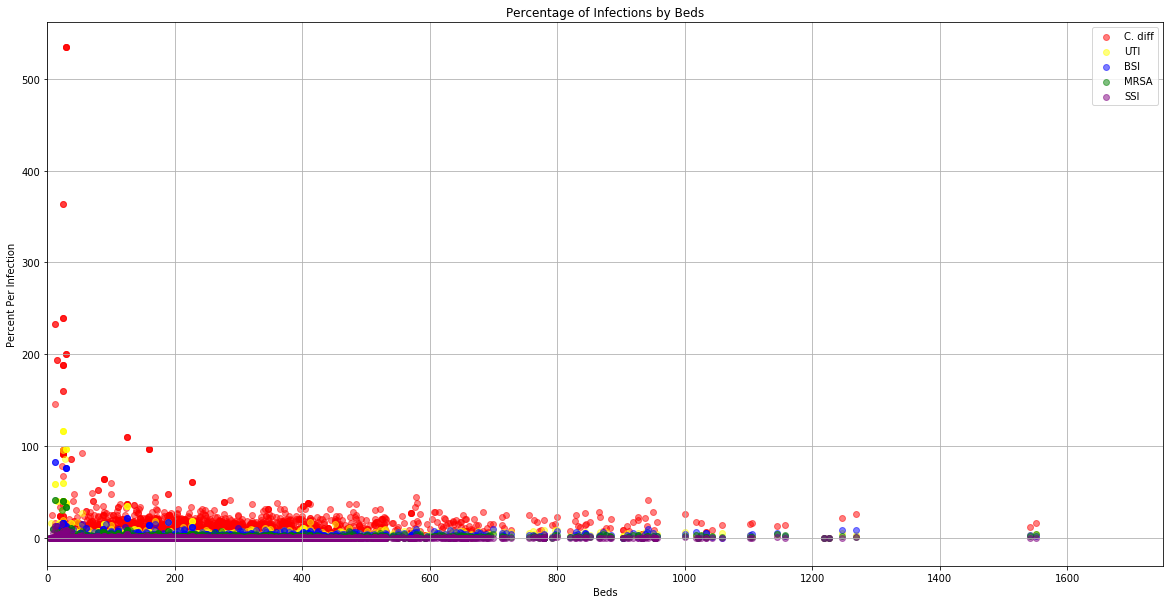

In [37]:
#Image
#Scatter plot of beds against percentage of each infection type
plt.figure(figsize=(20,10))
plt.scatter(final_df['Beds'], final_df['% C. diff'], c = 'red', marker='o', alpha=0.5, label='C. diff')
plt.scatter(final_df['Beds'], final_df['% CAUTI'], c = 'yellow', marker='o', alpha=0.5, label='UTI')
plt.scatter(final_df['Beds'], final_df['% CLABSI'], c = 'blue', marker='o', alpha=0.5, label='BSI')
plt.scatter(final_df['Beds'], final_df['% MRSA'], c = 'green', marker='o', alpha=0.5, label='MRSA')
plt.scatter(final_df['Beds'], final_df['% SSI'], c = 'purple', marker='o', alpha=0.5, label = 'SSI')

#adding grid            
plt.grid(True)

# x-axis labels, y-axis labels, title, legend
plt.xlim(0,1750)
plt.title('Percentage of Infections by Beds')
plt.xlabel('Beds')
plt.ylabel('Percent Per Infection')
plt.legend(loc='best')
plt.savefig('percent_infections_by_beds.png')

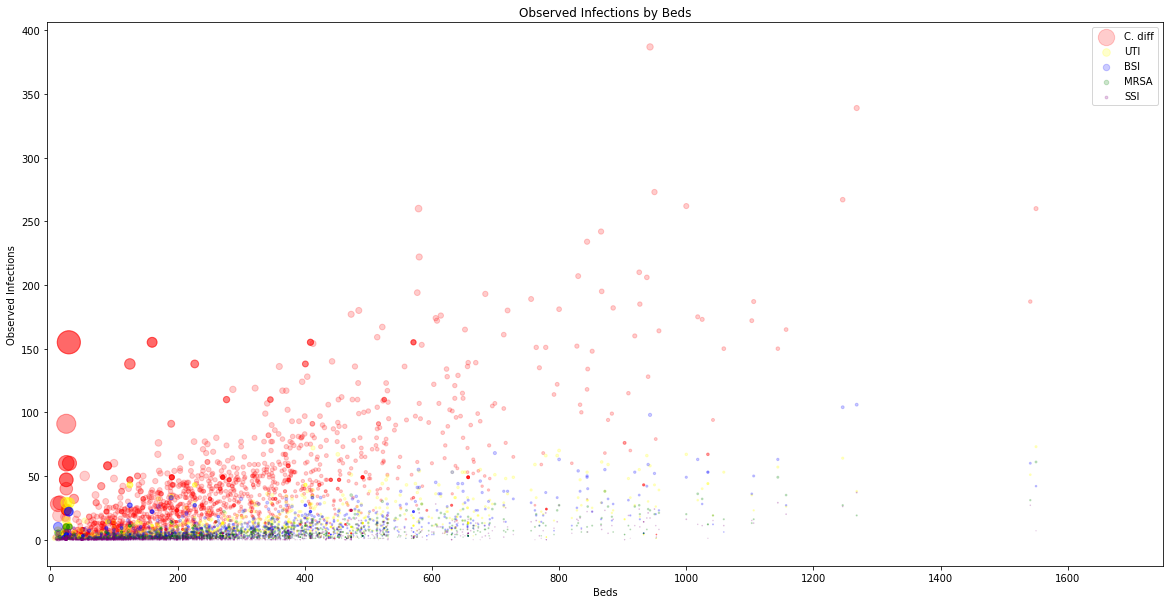

In [38]:
# Number of infections by bed

#Change fig size
plt.figure(figsize=(20,10))

plt.scatter(final_df['Beds'], final_df['C.diff Observed Cases'], c = 'red', marker='o', s=final_df['% C. diff'], alpha=0.2, label='C. diff')
plt.scatter(final_df['Beds'], final_df['CAUTI: Observed Cases'], c = 'yellow', marker='o', s=final_df['% CAUTI'], alpha=0.2, label='UTI')
plt.scatter(final_df['Beds'], final_df['CLABSI: Observed Cases'], c = 'blue', marker='o', s=final_df['% CLABSI'], alpha=0.2, label='BSI')
plt.scatter(final_df['Beds'], final_df['MRSA Observed Cases'], c = 'green', marker='o', s=final_df['% MRSA'], alpha=0.2, label='MRSA')
plt.scatter(final_df['Beds'], final_df['SSI: Colon Observed Cases'], c = 'purple', marker='o', s=final_df['% SSI'], alpha=0.2, label = 'SSI')

#adding grid            
#plt.grid(True)



# x-axis labels, y-axis labels, title, legend
plt.xlim(-5,1750)
plt.title('Observed Infections by Beds')
plt.xlabel('Beds')
plt.ylabel('Observed Infections')
plt.legend(loc='best')
plt.savefig('observed_infections_by_bed.png')

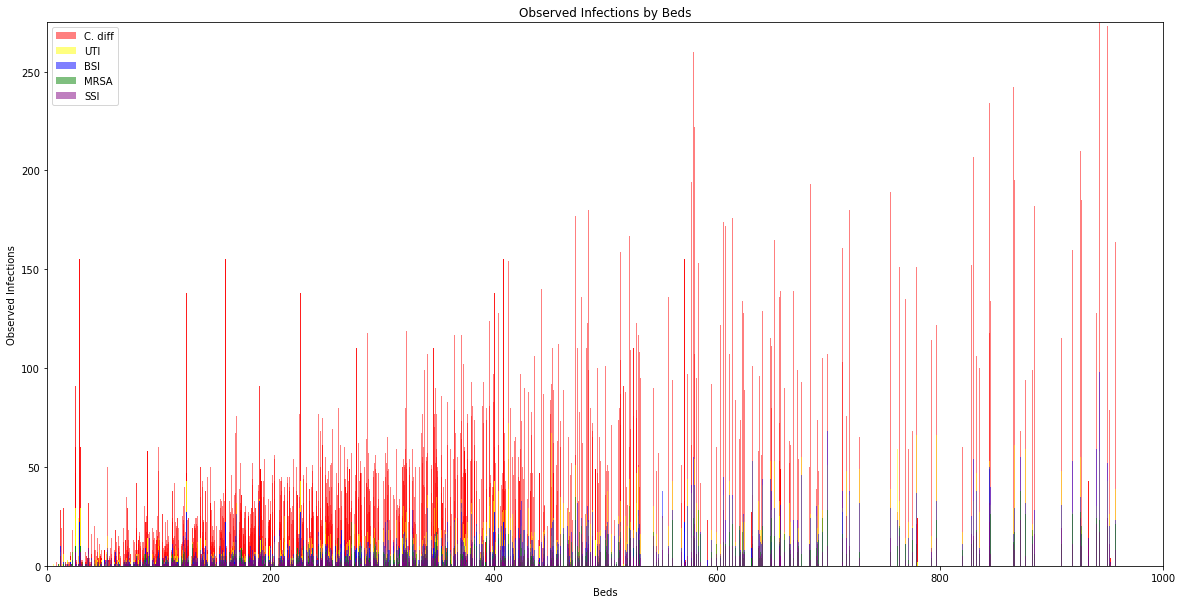

In [39]:
#stacked bar chart of above scatter plot
plt.figure(figsize=(20,10))
plt.bar(final_df['Beds'], final_df['C.diff Observed Cases'], color = 'red', alpha=0.5, label='C. diff')
plt.bar(final_df['Beds'], final_df['CAUTI: Observed Cases'], color = 'yellow', alpha=0.5, label='UTI')
plt.bar(final_df['Beds'], final_df['CLABSI: Observed Cases'], color = 'blue', alpha=0.5, label='BSI')
plt.bar(final_df['Beds'], final_df['MRSA Observed Cases'], color = 'green', alpha=0.5, label='MRSA')
plt.bar(final_df['Beds'], final_df['SSI: Colon Observed Cases'], color = 'purple', alpha=0.5, label = 'SSI')


#adding grid            
#plt.grid(True)

plt.xlim(0,1000)
plt.ylim(0,275)
plt.title('Observed Infections by Beds')
plt.xlabel('Beds')
plt.ylabel('Observed Infections')
plt.legend(loc='best')
plt.savefig('observed_infections_by_bed-bar.png')

In [40]:
#C. diff by number of beds
#plt.bar(final_df['Beds'], final_df['C.diff Observed Cases'], color = 'red', alpha=0.9, label='C. diff')


#plt.xlim(0,1000)
#plt.ylim(0,300)
#plt.title('Clostridium difficile')
#plt.xlabel('Beds')
#plt.ylabel('Observed Infections')
#plt.legend(loc='best')
#plt.figure(figsize=(20,10))
#plt.savefig('cd_by_beds.png')

In [41]:
#Hospital types
hosp_types = (actual_observed_df['Type']).values
hosp_types = np.unique(hosp_types)

In [42]:
print(hosp_types)

['CHILDREN' 'CHRONIC DISEASE' 'CRITICAL ACCESS' 'GENERAL ACUTE CARE'
 'LONG TERM CARE' 'PSYCHIATRIC' 'REHABILITATION' 'SPECIAL' 'WOMEN']


In [43]:
#Hospital owners
hosp_owner = (actual_observed_df['Owner']).values
hosp_owner = np.unique(hosp_owner)

In [44]:
print(hosp_owner)

['GOVERNMENT - FEDERAL' 'GOVERNMENT - LOCAL' 'GOVERNMENT - STATE'
 'NON-PROFIT' 'NOT AVAILABLE' 'PROPRIETARY' 'REGIONAL GOVERNMENT']


In [45]:
#Filter by owner 'GOVERNMENT - FEDERAL' 'GOVERNMENT - LOCAL' 'GOVERNMENT - STATE' 'NON-PROFIT' 'NOT AVAILABLE' 'PROPRIETARY' 'REGIONAL GOVERNMENT'
fed = actual_observed_df[actual_observed_df['Owner']=='GOVERNMENT - FEDERAL']
state = actual_observed_df[actual_observed_df['Owner']=='GOVERNMENT - STATE']
charity = actual_observed_df[actual_observed_df['Owner']=='NON-PROFIT']
#not_avail = actual_observed_df[actual_observed_df['Owner']=='NOT AVAILABLE']
private = actual_observed_df[actual_observed_df['Owner']=='PROPRIETARY']
regional = actual_observed_df[actual_observed_df['Owner']=='REGIONAL GOVERNMENT']

In [46]:
#Filter by type 'CHILDREN' 'CHRONIC DISEASE' 'CRITICAL ACCESS' 'GENERAL ACUTE CARE' 'LONG TERM CARE' 'PSYCHIATRIC' 'REHABILITATION' 'SPECIAL' 'WOMEN'
child = actual_observed_df[actual_observed_df['Type']=='CHILDREN']
chronic = actual_observed_df[actual_observed_df['Type']=='CHRONIC DISEASE']
critical =actual_observed_df[actual_observed_df['Type']=='CRITICAL ACCESS']
general = actual_observed_df[actual_observed_df['Type']=='GENERAL ACUTE CARE']
LTC = actual_observed_df[actual_observed_df['Type']=='LONG TERM CARE']
psych =actual_observed_df[actual_observed_df['Type']=='PSYCHIATRIC']
rehab =actual_observed_df[actual_observed_df['Type']=='REHABILITATION']
special =actual_observed_df[actual_observed_df['Type']=='SPECIAL']
women = actual_observed_df[actual_observed_df['Type']=='WOMEN']

In [47]:
#Mean by owner 
fed_mean = fed.groupby(['Owner']).mean()
state_mean = state.groupby(['Owner']).mean()
charity_mean = charity.groupby(['Owner']).mean()
#not_avail_bed = not_avail.groupby(['Owner','Beds']).mean()
private_mean = private.groupby(['Owner']).mean()
regional_mean = regional.groupby(['Owner']).mean()

In [48]:
#Mean by type
child_mean = child.groupby(['Type']).mean()
chronic_mean = chronic.groupby(['Type']).mean()
critical_mean = critical.groupby(['Type']).mean()
general_mean = general.groupby(['Type']).mean()
LTC_mean = LTC.groupby(['Type']).mean()
psych_mean = psych.groupby(['Type']).mean()
rehab_mean = rehab.groupby(['Type']).mean()
special_mean = special.groupby(['Type']).mean()
women_mean = women.groupby(['Type']).mean()

In [49]:
#beds by type
beds_types = [child_mean['Beds'].values[0],
              chronic_mean['Beds'].values[0],
              critical_mean['Beds'].values[0],
              general_mean['Beds'].values[0],
              LTC_mean['Beds'].values[0],
              psych_mean['Beds'].values[0],
              rehab_mean['Beds'].values[0],
              special_mean['Beds'].values[0],
              women_mean['Beds'].values[0]] 

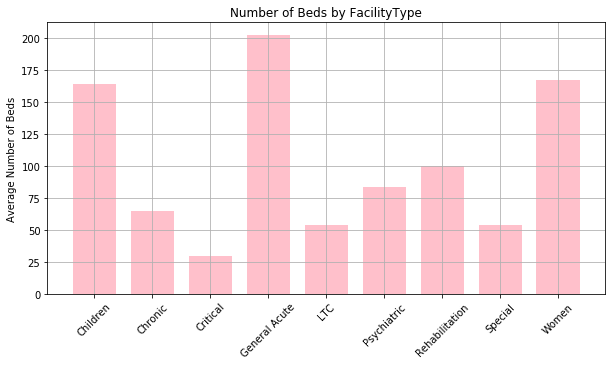

In [50]:
#bar graph average beds by type of hospital

fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(beds_types))
labels = ['Children','Chronic','Critical','General Acute','LTC','Psychiatric','Rehabilitation','Special','Women']

width = 0.75
ax.set_xticks(ind)
ax.set_title("Number of Beds by FacilityType")
ax.set_ylabel("Average Number of Beds")
ax.set_xticklabels(labels, rotation=45)
beds_type = ax.bar(ind,beds_types, width, color = "pink")

plt.grid(True)
plt.savefig('beds_by_type.png')

In [51]:
#beds by owner of hospital
beds_owner = [fed_mean['Beds'].values[0],
            regional_mean['Beds'].values[0],
            state_mean['Beds'].values[0],
            charity_mean['Beds'].values[0],
            private_mean['Beds'].values[0]]
            

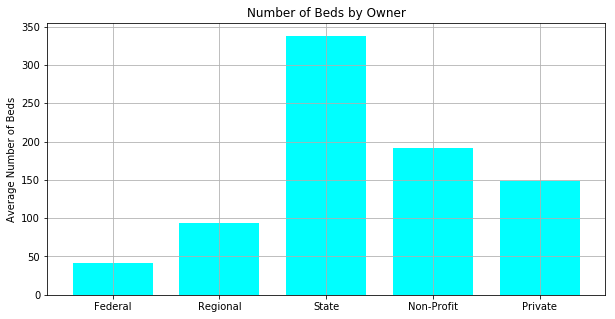

In [52]:
#bar graph average beds by owner
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(beds_owner))

ax.set_xticks(ind)
ax.set_title("Number of Beds by Owner")
ax.set_ylabel("Average Number of Beds")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
beds_owner = ax.bar(ind,beds_owner, width, color = "cyan")

plt.grid(True)
plt.savefig('beds_by_owner.png')

In [53]:
#owner by type
fed_own = fed.groupby(['Type'])['Owner'].count()
state_own = state.groupby(['Type'])['Owner'].count()
charity_own = charity.groupby(['Type'])['Owner'].count()
private_own = private.groupby(['Type'])['Owner'].count()
regional_own = regional.groupby(['Type'])['Owner'].count()

In [54]:
fed_calc = sum(fed_own)
fed_per = (fed_own/fed_calc)*100

state_calc = sum(state_own)
state_per = (state_own/state_calc)*100

charity_calc = sum(charity_own)
charity_per = (charity_own/charity_calc)*100

priv_calc = sum(private_own)
priv_per = (private_own/priv_calc)*100

reg_calc = sum(regional_own)
reg_per = (regional_own/reg_calc)*100

In [55]:
owner_type_percent = {'Federal':fed_per,
                      'Regional':reg_per,
                      'State':state_per, 
                      'Non-Profit':charity_per, 
                      'Private':priv_per}
owner_type_percent_df = pd.DataFrame(owner_type_percent)

In [56]:
#owner_type_percent_df.reset_index(inplace=True)

In [57]:
owner_type_percent_df

Federal  Non-Profit    Private   Regional  State
CHILDREN                  NaN    2.179177   0.547945        NaN    NaN
CHRONIC DISEASE           NaN    0.048426        NaN        NaN    NaN
CRITICAL ACCESS     57.142857   20.387409   4.931507  41.036717    NaN
GENERAL ACUTE CARE  42.857143   76.658596  87.808219  58.747300   85.0
LONG TERM CARE            NaN    0.048426   0.958904        NaN    2.5
PSYCHIATRIC               NaN    0.242131   0.958904   0.215983    NaN
REHABILITATION            NaN    0.145278   0.410959        NaN    2.5
SPECIAL                   NaN    0.242131   4.246575        NaN   10.0
WOMEN                     NaN    0.048426   0.136986        NaN    NaN

In [58]:
owner_type_percent_df = owner_type_percent_df.fillna(0)

In [59]:
owner_type_percent_df

Federal  Non-Profit    Private   Regional  State
CHILDREN             0.000000    2.179177   0.547945   0.000000    0.0
CHRONIC DISEASE      0.000000    0.048426   0.000000   0.000000    0.0
CRITICAL ACCESS     57.142857   20.387409   4.931507  41.036717    0.0
GENERAL ACUTE CARE  42.857143   76.658596  87.808219  58.747300   85.0
LONG TERM CARE       0.000000    0.048426   0.958904   0.000000    2.5
PSYCHIATRIC          0.000000    0.242131   0.958904   0.215983    0.0
REHABILITATION       0.000000    0.145278   0.410959   0.000000    2.5
SPECIAL              0.000000    0.242131   4.246575   0.000000   10.0
WOMEN                0.000000    0.048426   0.136986   0.000000    0.0

In [61]:
cd_owner = [fed_mean['C.diff Observed Cases'].values[0], 
            regional_mean['C.diff Observed Cases'].values[0],
            state_mean['C.diff Observed Cases'].values[0],
            charity_mean['C.diff Observed Cases'].values[0],
            private_mean['C.diff Observed Cases'].values[0]]

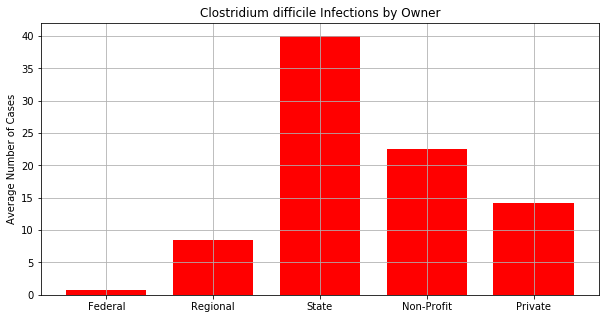

In [62]:
#bar graph of mean by owner, C. diff
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(cd_owner))

ax.set_xticks(ind)
ax.set_title("Clostridium difficile Infections by Owner")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
cd = ax.bar(ind,cd_owner, width, color = 'red')

plt.grid(True)
plt.savefig('cd_by_owner.png')


In [63]:
uti_owner = [fed_mean['CAUTI: Observed Cases'].values[0], 
            regional_mean['CAUTI: Observed Cases'].values[0],
            state_mean['CAUTI: Observed Cases'].values[0],
            charity_mean['CAUTI: Observed Cases'].values[0],
            private_mean['CAUTI: Observed Cases'].values[0]]

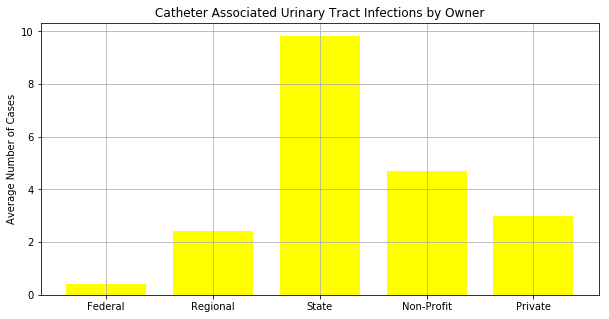

In [64]:
#bar graph of mean by owner, UTI
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(uti_owner))

ax.set_xticks(ind)
ax.set_title("Catheter Associated Urinary Tract Infections by Owner")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
uti = ax.bar(ind,uti_owner, width, color = 'yellow')

plt.grid(True)
plt.savefig('uti_by_owner.png')

In [65]:
bsi_owner = [fed_mean['CLABSI: Observed Cases'].values[0], 
            regional_mean['CLABSI: Observed Cases'].values[0],
            state_mean['CLABSI: Observed Cases'].values[0],
            charity_mean['CLABSI: Observed Cases'].values[0],
            private_mean['CLABSI: Observed Cases'].values[0]]

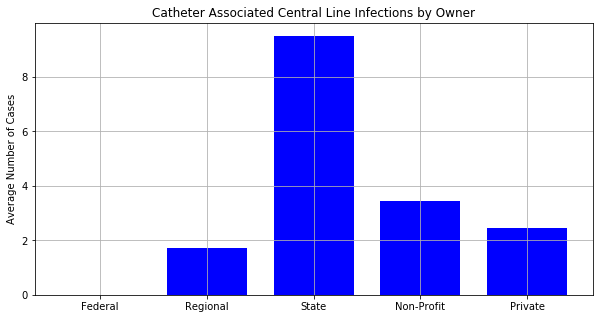

In [66]:
#bar graph of mean by owner, BSI
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(bsi_owner))

ax.set_xticks(ind)
ax.set_title("Catheter Associated Central Line Infections by Owner")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
bsi = ax.bar(ind,bsi_owner, width, color = 'blue')

plt.grid(True)
plt.savefig('bsi_by_owner.png')

In [67]:
mrsa_owner = [fed_mean['MRSA Observed Cases'].values[0], 
            regional_mean['MRSA Observed Cases'].values[0],
            state_mean['MRSA Observed Cases'].values[0],
            charity_mean['MRSA Observed Cases'].values[0],
            private_mean['MRSA Observed Cases'].values[0]]

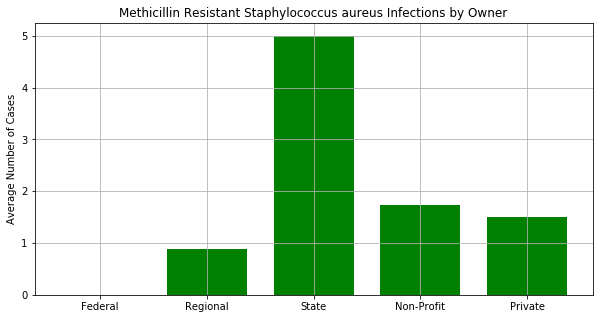

In [68]:
#bar graph of mean by owner, MRSA
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(mrsa_owner))

ax.set_xticks(ind)
ax.set_title("Methicillin Resistant Staphylococcus aureus Infections by Owner")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
bsi = ax.bar(ind,mrsa_owner, width, color = 'green')

plt.grid(True)
plt.savefig('mrsa_by_owner.png')

In [69]:
#SSI by owner
ssi_owner = [fed_mean['SSI: Colon Observed Cases'].values[0], 
            regional_mean['SSI: Colon Observed Cases'].values[0],
            state_mean['SSI: Colon Observed Cases'].values[0],
            charity_mean['SSI: Colon Observed Cases'].values[0],
            private_mean['SSI: Colon Observed Cases'].values[0]]

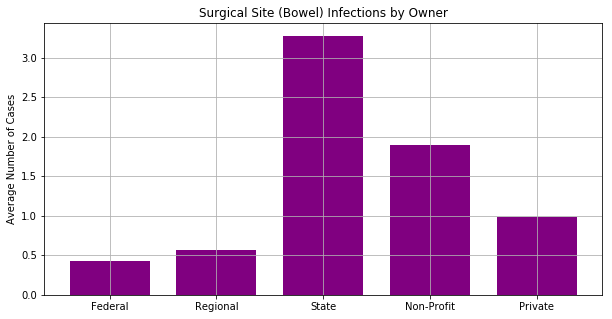

In [70]:
#bar graph of mean by owner, SSI
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(ssi_owner))

ax.set_xticks(ind)
ax.set_title("Surgical Site (Bowel) Infections by Owner")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
bsi = ax.bar(ind,ssi_owner, width, color = 'purple')

plt.grid(True)
plt.savefig('ssi_by_owner.png')

In [71]:
#mean of all observed infections by owner
all_infect_fed = (fed['C.diff Observed Cases'] +
              fed['CAUTI: Observed Cases'] +
              fed['CLABSI: Observed Cases'] +
              fed['MRSA Observed Cases'] +
              fed['SSI: Colon Observed Cases']).values[0]

all_infect_reg = (regional['C.diff Observed Cases'] +
              regional['CAUTI: Observed Cases'] +
              regional['CLABSI: Observed Cases'] +
              regional['MRSA Observed Cases'] +
              regional['SSI: Colon Observed Cases']).values[0]

all_infect_state = (state['C.diff Observed Cases'] +
              state['CAUTI: Observed Cases'] +
              state['CLABSI: Observed Cases'] +
              state['MRSA Observed Cases'] +
              state['SSI: Colon Observed Cases']).values[0]
all_infect_non = (charity['C.diff Observed Cases'] +
              charity['CAUTI: Observed Cases'] +
              charity['CLABSI: Observed Cases'] +
              charity['MRSA Observed Cases'] +
              charity['SSI: Colon Observed Cases']).values[0]

all_infect_priv = (private['C.diff Observed Cases'] +
              private['CAUTI: Observed Cases'] +
              private['CLABSI: Observed Cases'] +
              private['MRSA Observed Cases'] +
              private['SSI: Colon Observed Cases']).values[0]

In [72]:
own_infect = [all_infect_fed, all_infect_reg, all_infect_state,all_infect_non,all_infect_priv]

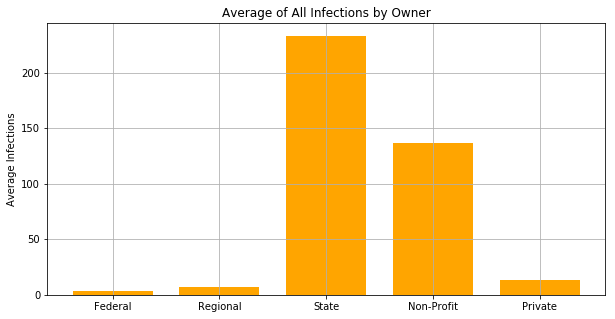

In [73]:
#Graph of average infections by owner
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(own_infect))

ax.set_xticks(ind)
ax.set_title("Average of All Infections by Owner")
ax.set_ylabel('Average Infections')
ax.set_xticklabels(('Federal','Regional','State','Non-Profit','Private'))
width = 0.75
own = ax.bar(ind,own_infect, width, color = "orange")

plt.grid(True)
plt.savefig('avg_infect_by_owner.png')

In [74]:
#mean of all observed infections by type
#'Children','Chronic','Critical','General Acute','LTC','Psychiatric','Rehabilitation','Special','Women'
all_infect_child = (child['C.diff Observed Cases'] +
              child['CAUTI: Observed Cases'] +
              child['CLABSI: Observed Cases'] +
              child['MRSA Observed Cases'] +
              child['SSI: Colon Observed Cases']).values[0]

all_infect_chronic = (chronic['C.diff Observed Cases'] +
              chronic['CAUTI: Observed Cases'] +
              chronic['CLABSI: Observed Cases'] +
              chronic['MRSA Observed Cases'] +
              chronic['SSI: Colon Observed Cases']).values[0]

all_infect_critical = (critical['C.diff Observed Cases'] +
              critical['CAUTI: Observed Cases'] +
              critical['CLABSI: Observed Cases'] +
              critical['MRSA Observed Cases'] +
              critical['SSI: Colon Observed Cases']).values[0]

all_infect_gen = (general['C.diff Observed Cases'] +
              general['CAUTI: Observed Cases'] +
              general['CLABSI: Observed Cases'] +
              general['MRSA Observed Cases'] +
              general['SSI: Colon Observed Cases']).values[0]

all_infect_ltc = (LTC['C.diff Observed Cases'] +
              LTC['CAUTI: Observed Cases'] +
              LTC['CLABSI: Observed Cases'] +
              LTC['MRSA Observed Cases'] +
              LTC['SSI: Colon Observed Cases']).values[0]

all_infect_psych = (psych['C.diff Observed Cases'] +
              psych['CAUTI: Observed Cases'] +
              psych['CLABSI: Observed Cases'] +
              psych['MRSA Observed Cases'] +
              psych['SSI: Colon Observed Cases']).values[0]

all_infect_rehab = (rehab['C.diff Observed Cases'] +
              rehab['CAUTI: Observed Cases'] +
              rehab['CLABSI: Observed Cases'] +
              rehab['MRSA Observed Cases'] +
              rehab['SSI: Colon Observed Cases']).values[0]

all_infect_special = (special['C.diff Observed Cases'] +
              special['CAUTI: Observed Cases'] +
              special['CLABSI: Observed Cases'] +
              special['MRSA Observed Cases'] +
              special['SSI: Colon Observed Cases']).values[0]

all_infect_women = (women['C.diff Observed Cases'] +
              women['CAUTI: Observed Cases'] +
              women['CLABSI: Observed Cases'] +
              women['MRSA Observed Cases'] +
              women['SSI: Colon Observed Cases']).values[0]


In [75]:
all_infect_gen

1

In [76]:
#infections by facility
type_infect = [all_infect_child,
               all_infect_chronic,
               all_infect_critical,
               all_infect_gen,
               all_infect_ltc,
               all_infect_psych,
               all_infect_rehab,
               all_infect_special,
               all_infect_women]

In [77]:
type_infect

[0, 7, 0, 1, 0, 86, 0, 0, 0]

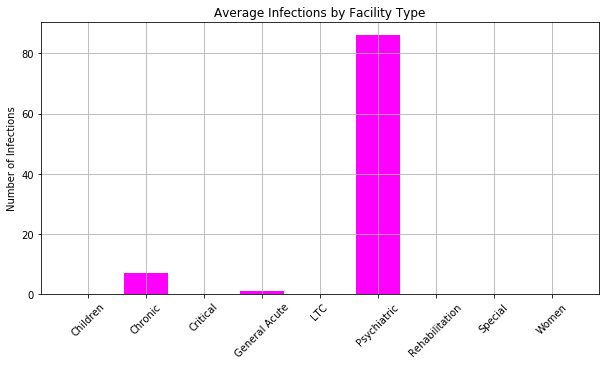

In [78]:
#average of all infections by facility type
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_infect))
labels = ['Children','Chronic','Critical','General Acute','LTC','Psychiatric','Rehabilitation','Special','Women']

ax.set_xticks(ind)
ax.set_title("Average Infections by Facility Type")
ax.set_ylabel("Number of Infections")
ax.set_xticklabels(labels, rotation=45)
infect_type = ax.bar(ind,type_infect, width, color = "magenta")

plt.grid(True)
plt.savefig('average_infections_by_facility_type.png')

In [79]:
type_cd = [child_mean['C.diff Observed Cases'].values[0],
           chronic_mean['C.diff Observed Cases'].values[0],
           critical_mean['C.diff Observed Cases'].values[0],
           general_mean['C.diff Observed Cases'].values[0],
           LTC_mean['C.diff Observed Cases'].values[0],
           psych_mean['C.diff Observed Cases'].values[0],
           rehab_mean['C.diff Observed Cases'].values[0],
           special_mean['C.diff Observed Cases'].values[0],
           women_mean['C.diff Observed Cases'].values[0]]

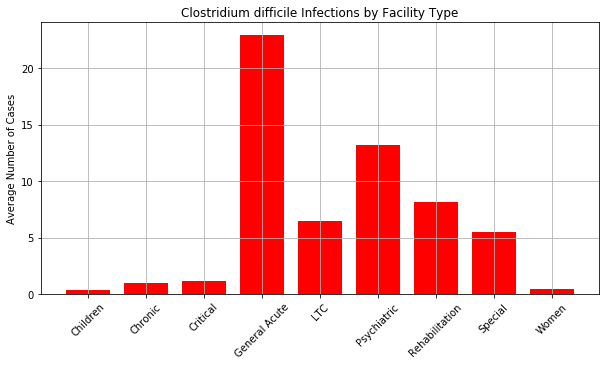

In [80]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_cd))

ax.set_xticks(ind)
ax.set_title("Clostridium difficile Infections by Facility Type")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Children', 'Chronic, Critical', 'General', 'LTC','Psychiatric','Rehabilitation','Special','Women'))
ax.set_xticklabels(labels, rotation=45)
width = 0.75
bsi = ax.bar(ind,type_cd, width, color = 'red')

plt.grid(True)
plt.savefig('cd_by_type.png')

In [81]:
type_uti = [child_mean['CAUTI: Observed Cases'].values[0],
           chronic_mean['CAUTI: Observed Cases'].values[0],
           critical_mean['CAUTI: Observed Cases'].values[0],
           general_mean['CAUTI: Observed Cases'].values[0],
           LTC_mean['CAUTI: Observed Cases'].values[0],
           psych_mean['CAUTI: Observed Cases'].values[0],
           rehab_mean['CAUTI: Observed Cases'].values[0],
           special_mean['CAUTI: Observed Cases'].values[0],
           women_mean['CAUTI: Observed Cases'].values[0]]

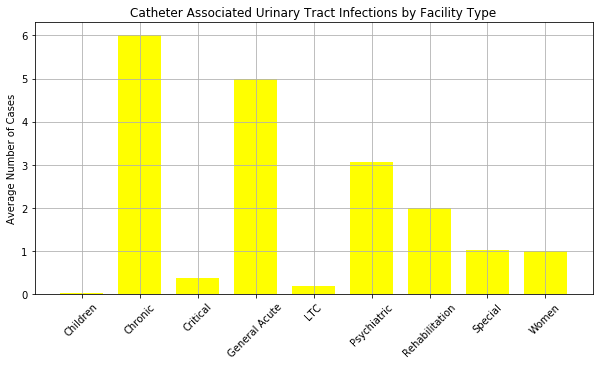

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_uti))

ax.set_xticks(ind)
ax.set_title("Catheter Associated Urinary Tract Infections by Facility Type")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Children', 'Chronic, Critical', 'General', 'LTC','Psychiatric','Rehabilitation','Special','Women'))
ax.set_xticklabels(labels, rotation=45)
width = 0.75
bsi = ax.bar(ind,type_uti, width, color = 'yellow')

plt.grid(True)
plt.savefig('uti_by_type.png')

In [83]:
type_bsi = [child_mean['CLABSI: Observed Cases'].values[0],
           chronic_mean['CLABSI: Observed Cases'].values[0],
           critical_mean['CLABSI: Observed Cases'].values[0],
           general_mean['CLABSI: Observed Cases'].values[0],
           LTC_mean['CLABSI: Observed Cases'].values[0],
           psych_mean['CLABSI: Observed Cases'].values[0],
           rehab_mean['CLABSI: Observed Cases'].values[0],
           special_mean['CLABSI: Observed Cases'].values[0],
           women_mean['CLABSI: Observed Cases'].values[0]]

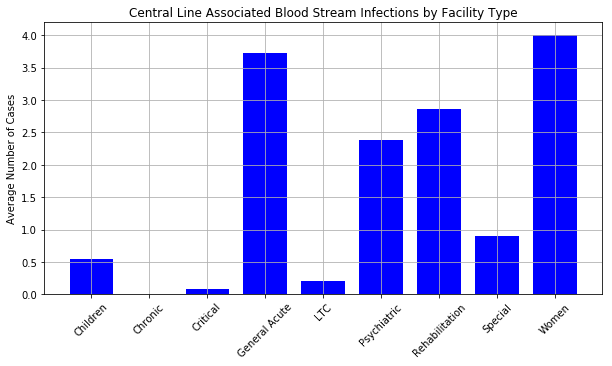

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_bsi))

ax.set_xticks(ind)
ax.set_title("Central Line Associated Blood Stream Infections by Facility Type")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Children', 'Chronic, Critical', 'General', 'LTC','Psychiatric','Rehabilitation','Special','Women'))
ax.set_xticklabels(labels, rotation=45)
width = 0.75
bsi = ax.bar(ind,type_bsi, width, color = 'blue')

plt.grid(True)
plt.savefig('bsi_by_type.png')

In [85]:
type_mrsa = [child_mean['MRSA Observed Cases'].values[0],
           chronic_mean['MRSA Observed Cases'].values[0],
           critical_mean['MRSA Observed Cases'].values[0],
           general_mean['MRSA Observed Cases'].values[0],
           LTC_mean['MRSA Observed Cases'].values[0],
           psych_mean['MRSA Observed Cases'].values[0],
           rehab_mean['MRSA Observed Cases'].values[0],
           special_mean['MRSA Observed Cases'].values[0],
           women_mean['MRSA Observed Cases'].values[0]]

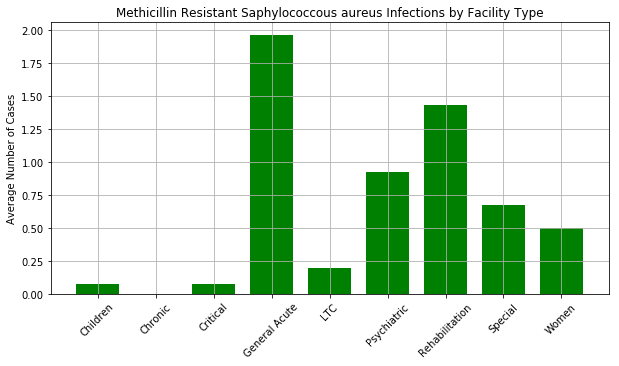

In [86]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_mrsa))

ax.set_xticks(ind)
ax.set_title("Methicillin Resistant Saphylococcous aureus Infections by Facility Type")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Children', 'Chronic, Critical', 'General', 'LTC','Psychiatric','Rehabilitation','Special','Women'))
ax.set_xticklabels(labels, rotation=45)
width = 0.75
bsi = ax.bar(ind,type_mrsa, width, color = 'green')

plt.grid(True)
plt.savefig('mrsa_by_type.png')

In [87]:
type_ssi = [child_mean['SSI: Colon Observed Cases'].values[0],
           chronic_mean['SSI: Colon Observed Cases'].values[0],
           critical_mean['SSI: Colon Observed Cases'].values[0],
           general_mean['SSI: Colon Observed Cases'].values[0],
           LTC_mean['SSI: Colon Observed Cases'].values[0],
           psych_mean['SSI: Colon Observed Cases'].values[0],
           rehab_mean['SSI: Colon Observed Cases'].values[0],
           special_mean['SSI: Colon Observed Cases'].values[0],
           women_mean['SSI: Colon Observed Cases'].values[0]]

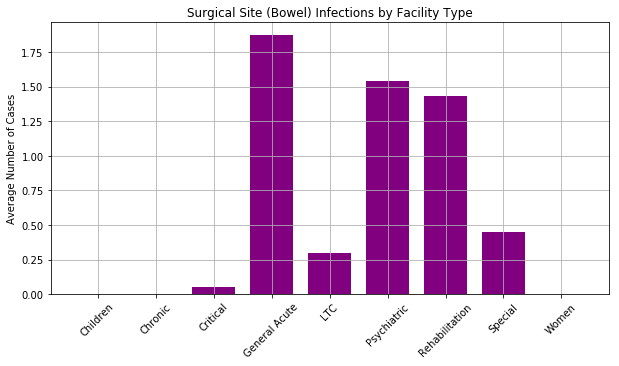

In [88]:
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(type_ssi))

ax.set_xticks(ind)
ax.set_title("Surgical Site (Bowel) Infections by Facility Type")
ax.set_ylabel("Average Number of Cases")
ax.set_xticklabels(('Children', 'Chronic, Critical', 'General', 'LTC','Psychiatric','Rehabilitation','Special','Women'))
ax.set_xticklabels(labels, rotation=45)
width = 0.75
bsi = ax.bar(ind,type_ssi, width, color = 'purple')

plt.grid(True)
plt.savefig('ssi_by_type.png')